In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df = pd.read_csv('data/sales_train.csv.gz')

In [4]:
df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

In [5]:
items = pd.read_csv('data/items.csv')

In [6]:
items.head()

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

In [8]:
item_categories = pd.read_csv('data/item_categories.csv')

In [9]:
item_categories.head()

item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4

In [10]:
shops = pd.read_csv('data/shops.csv')

In [11]:
shops.head()

shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

In [12]:
df.shape

(2935849, 6)

In [13]:
df.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [14]:
df.describe(include='all')

date  date_block_num       shop_id       item_id    item_price  \
count      2935849    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06   
unique        1034             NaN           NaN           NaN           NaN   
top     28.12.2013             NaN           NaN           NaN           NaN   
freq          9434             NaN           NaN           NaN           NaN   
mean           NaN    1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02   
std            NaN    9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03   
min            NaN    0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00   
25%            NaN    7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02   
50%            NaN    1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02   
75%            NaN    2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02   
max            NaN    3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05   

        item_cnt_day  
count   2.935849e+06  
unique           NaN  
top              NaN  
freq             NaN  
mean    1.242641e+00  
std     2.618834e+00  
min    -2.200000e+01  
25%     1.000000e+00  
50%     1.000000e+00  
75%     1.000000e+00  
max     2.169000e+03

In [16]:
df.isnull().any()

date              False
date_block_num    False
shop_id           False
item_id           False
item_price        False
item_cnt_day      False
dtype: bool

In [19]:
df.isnull().all(axis=1).sum()

0

In [20]:
df.isnull().sum(axis=0)

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [21]:
df.isnull().mean(axis=0)

date              0.0
date_block_num    0.0
shop_id           0.0
item_id           0.0
item_price        0.0
item_cnt_day      0.0
dtype: float64

In [23]:
df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [26]:
df.date = pd.to_datetime(df.date)

In [27]:
df.set_index('date', inplace=True)

In [28]:
df.head()

date_block_num  shop_id  item_id  item_price  item_cnt_day
date                                                                  
2013-02-01               0       59    22154      999.00           1.0
2013-03-01               0       25     2552      899.00           1.0
2013-05-01               0       25     2552      899.00          -1.0
2013-06-01               0       25     2554     1709.05           1.0
2013-01-15               0       25     2555     1099.00           1.0

In [37]:
df.shop_id.value_counts()[0:10]

31    235636
25    186104
54    143480
28    142234
57    117428
42    109253
27    105366
6      82663
58     71441
56     69573
Name: shop_id, dtype: int64

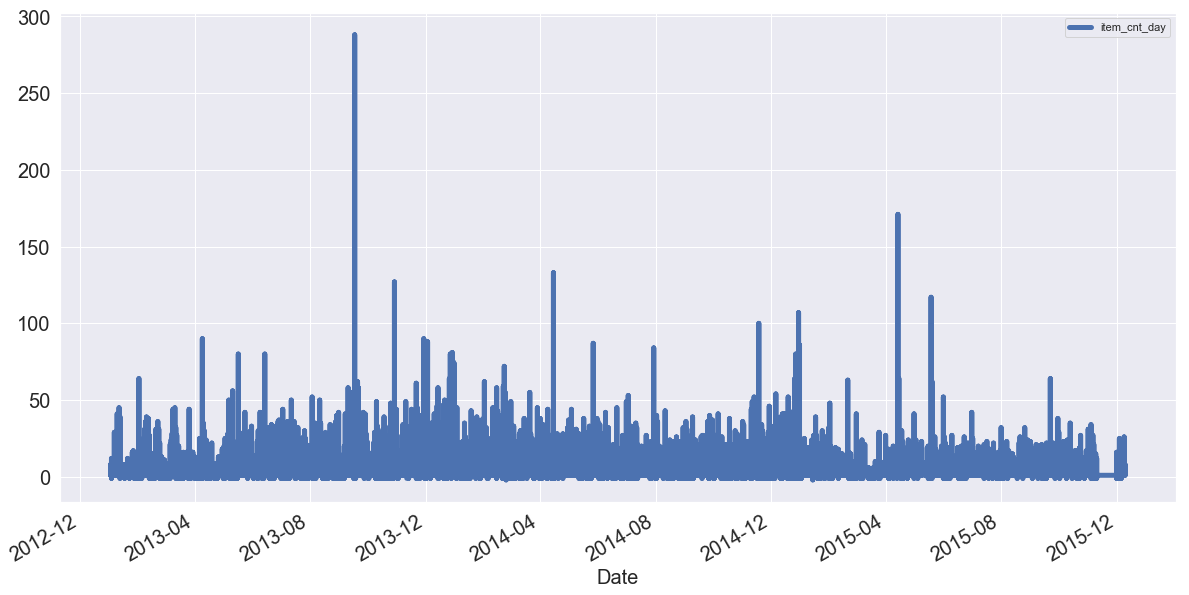

In [43]:
df_shop_31 = df[df.shop_id == 31]
df_shop_31[['item_cnt_day']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);

In [38]:
df.head()

date_block_num  shop_id  item_id  item_price  item_cnt_day
date                                                                  
2013-02-01               0       59    22154      999.00           1.0
2013-03-01               0       25     2552      899.00           1.0
2013-05-01               0       25     2552      899.00          -1.0
2013-06-01               0       25     2554     1709.05           1.0
2013-01-15               0       25     2555     1099.00           1.0

In [41]:
items_per_month = (
    df['item_cnt_day']
         .groupby(df['date_block_num'])
         .sum()
         .rename('total items')
         .reset_index() 
) 
items_per_month.head()

date_block_num  total items
0               0     131479.0
1               1     128090.0
2               2     147142.0
3               3     107190.0
4               4     106970.0

In [67]:
items_per_month_shop = (
    df.groupby(['date_block_num','shop_id']).sum().add_suffix('_sum').reset_index()
) 
items_per_month_shop.head()

date_block_num  shop_id  item_id_sum  item_price_sum  item_cnt_day_sum
0               0        0     50791835    2.546339e+06            5578.0
1               0        1     28789014    1.378736e+06            2947.0
2               0        2     10025040    1.028861e+06            1146.0
3               0        3      6867501    5.500130e+05             767.0
4               0        4     17507849    1.330204e+06            2114.0

In [68]:
items_per_month_shop[items_per_month_shop['shop_id'] == 31][['item_cnt_day_sum']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time (No. of months)', fontsize=20);

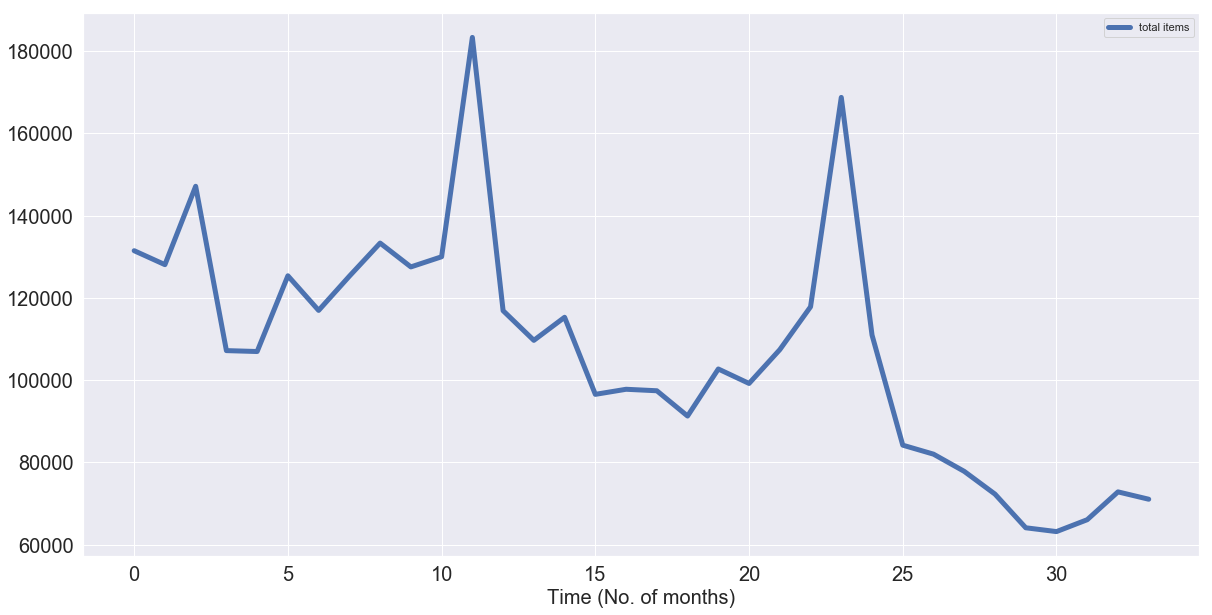

In [69]:
items_per_month[['total items']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time (No. of months)', fontsize=20);